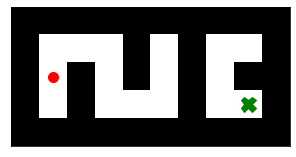

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the maze size and structure
maze = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 1],
    [1, 0, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

# Set start and end points
start = (1, 1)
end = (3, 8)

# Initialize player position
player_pos = start

# Create colormap for the maze
cmap = colors.ListedColormap(['white', 'black'])
bounds = [0, 0.5, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)

def draw_maze(maze, player_pos):
    # Draw the maze
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(maze, cmap=cmap, norm=norm)
    
    # Draw the player
    ax.plot(player_pos[1], player_pos[0], 'o', color='red', markersize=10)
    
    # Draw the end point
    ax.plot(end[1], end[0], 'X', color='green', markersize=15)
    
    # Set the x and y axis labels
    plt.xticks([]), plt.yticks([])
    plt.show()

# Button widget
button_layout = widgets.Layout(width='50px', height='30px')
up_button = widgets.Button(description='Up', layout=button_layout)
down_button = widgets.Button(description='Down', layout=button_layout)
left_button = widgets.Button(description='Left', layout=button_layout)
right_button = widgets.Button(description='Right', layout=button_layout)

# Display the initial maze
draw_maze(maze, player_pos)

# Define button click actions
def move_up(b):
    global player_pos
    if maze[player_pos[0] - 1, player_pos[1]] == 0:
        player_pos = (player_pos[0] - 1, player_pos[1])
    clear_output(wait=True)
    draw_maze(maze, player_pos)

def move_down(b):
    global player_pos
    if maze[player_pos[0] + 1, player_pos[1]] == 0:
        player_pos = (player_pos[0] + 1, player_pos[1])
    clear_output(wait=True)
    draw_maze(maze, player_pos)

def move_left(b):
    global player_pos
    if maze[player_pos[0], player_pos[1] - 1] == 0:
        player_pos = (player_pos[0], player_pos[1] - 1)
    clear_output(wait=True)
    draw_maze(maze, player_pos)

def move_right(b):
    global player_pos
    if maze[player_pos[0], player_pos[1] + 1] == 0:
        player_pos = (player_pos[0], player_pos[1] + 1)
    clear_output(wait=True)
    draw_maze(maze, player_pos)

# Attach the button click actions
up_button.on_click(move_up)
down_button.on_click(move_down)
left_button.on_click(move_left)
right_button.on_click(move_right)

# Display the buttons
button_box = widgets.HBox([left_button, down_button, up_button, right_button])
display(button_box)
